### Read the response function

*July 2016, Erik Hogenbirk, ehogenbi@nikhef.nl*

This notebook reads the response function from a data file. This is the response function of a NE213 detector. The function we got from Andreas Zimbal. The file itself is in ASCII format and contains the response in keVee for different neutron energies. 

**Important notes**:
  * The neutron energies are *NOT* equally spaced, the energy response is.
  * It is not really clear what the y scaling is. It is not normalized (see last plot). An educated guess: the interaction probability given that the neutron particle crosses the detector? The integral is in the order 0.05 - 0.1

In [10]:
%run 'function_definitions.ipynb'

In [2]:
response_file = './PTB_DATA/response_function/n100cm25nl50.rsp'

In [3]:
def read_response_file(fn):
    resp = []
    neutron_energies = []
    electron_energies = []
    
    with open(fn) as f:
        for i, line in enumerate(f):
            if i == 0:
                # Skip first line
                continue                
            if (i - 1) % 373 == 0: # This line contains the neutron energy
                
                neutron_energies.append(float(line.split(sep=' ')[2]))
                
                if i == 1: 
                    # The electron energies we extract only for the first sample, it's the same everywhere
                    split_line = (line.split(sep = ' '))
                    split_line = [float(x) for x in split_line if x != '']
                    electron_energies = np.linspace(split_line[2], split_line[3], split_line[1])
                    
                
                if i != 1:
                    # We finished a PHS (unless first time)! Let's append it to the array.
                    resp.append([np.array(phs)])
                # Reset pulse height spectrum
                phs = []
                continue
            split_line = line.split(sep=' ')
            bla = [float(n) for n in split_line if n != '']
            
            phs += bla            
            
    resp.append([np.array(phs)])
    resp = np.concatenate(resp)
    neutron_energies = np.array(neutron_energies)
    assert len(neutron_energies) == len(resp)
    assert len(electron_energies) == len(resp[0])
    return resp, neutron_energies, electron_energies

In [4]:
response, neutron_energies, electron_energies = read_response_file(response_file)

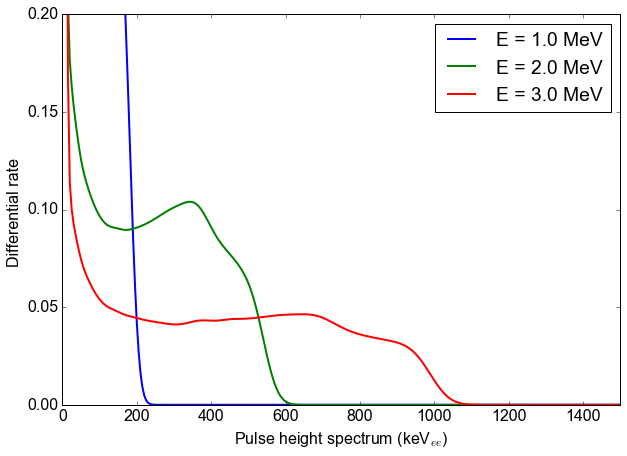

In [22]:
# Plot a few energy responses as an example
sel = np.array([True if (i%70== 0) and i< 400 else False for i in range(len(neutron_energies))]) #(neutron_energies > 2.4) & (neutron_energies < 2.6)

positions = [closest_element_pos(neutron_energies, _energy) for _energy in [1.0,2.0,3.0]]
sel = np.array([True if i in positions else False for i in range(len(neutron_energies))])


for phs, e in zip(response[sel], neutron_energies[sel]):
    plt.plot(1000*electron_energies, phs, label='E = %.1f MeV' % e, lw=2)
plt.xlabel('Pulse height spectrum (keV$_{ee}$)')
plt.ylabel('Differential rate ')
#plt.yscale('log')
plt.legend()
plt.xlim(0,1500)
plt.ylim(0,0.2)
plt.savefig('response_function.png', bbox_inches = 'tight')
plt.show()

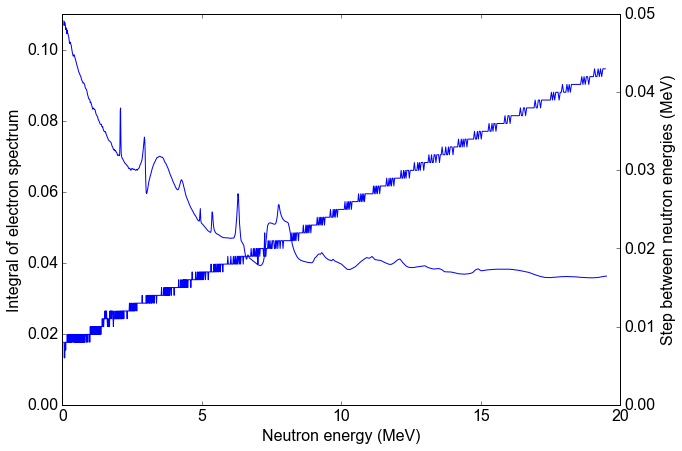

In [6]:
plt.plot(neutron_energies, np.sum(response, axis=1)*(electron_energies[1]-electron_energies[0]))
plt.ylabel('Integral of electron spectrum')
plt.xlabel('Neutron energy (MeV)')
plt.ylim(0,0.11)
plt.twinx()
plt.ylabel('Step between neutron energies (MeV)')
plt.ylim(0,0.05)
plt.plot(neutron_energies[:-1], np.diff(neutron_energies))

In [7]:
with open('neutron_energies.txt', 'w') as f:
    for e in neutron_energies:
        f.write(str(e) + '\n')